<a href="https://colab.research.google.com/github/cyrusnavasca/cc-default-prediction/blob/main/Predicting_CC_Default_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Importing Data + Variable Info

In [339]:
# Installing Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [340]:
# Reading in data and printing first 5 observations
credit_data = pd.read_excel("default_of_credit_card_clients.xls")
credit_data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


## Variable Information
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = other).

X4: Marital status (1 = married; 2 = single; 3 = other).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# 1. Data Cleaning

In [341]:
# Loop will not run if data is already clean
if credit_data.columns[1] != 'X1':
  pass

else:
  for i in range(len(credit_data.columns)):
      # Renaming columns based on Row 0
      original_name = credit_data.columns[i]
      new_name = credit_data.iloc[0, i]
      credit_data.rename(columns={original_name: new_name}, inplace=True)

# Dropping Row 0
credit_data.drop(index=0, inplace=True)

In [342]:
# Renaming target column to 'default'
credit_data.rename(columns={'default payment next month': 'default'},
                   inplace=True)

# Renaming 'PAY_0' to 'PAY_1'
credit_data.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)

In [343]:
# Aggregating columns by taking sum and/or mean

# PAY column
credit_data['AVG_PAY'] = credit_data[['PAY_1', 'PAY_2', 'PAY_3',
                                      'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)

# BILL_AMT column
credit_data['TOTAL_BILL_AMT'] = credit_data[['BILL_AMT1', 'BILL_AMT2',
                                             'BILL_AMT3', 'BILL_AMT4',
                                             'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)

credit_data['AVG_BILL_AMT'] = credit_data[['BILL_AMT1', 'BILL_AMT2',
                                           'BILL_AMT3', 'BILL_AMT4',
                                           'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)

# PAY_AMT column
credit_data['TOTAL_PAY_AMT'] = credit_data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                            'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)

credit_data['AVG_PAY_AMT'] = credit_data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                          'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)

In [344]:
# Dropping unnecessary or aggregated columns

# ID column
credit_data.drop(columns='ID', inplace=True)

# PAY 1-6, BILL_AMT 1-6, PAY_AMT 1-6
for i in range(1,7):
  n = str(i)
  credit_data.drop(columns=['PAY_' + n, 'BILL_AMT' + n, 'PAY_AMT' + n],
                   inplace=True)

In [345]:
from sklearn.preprocessing import StandardScaler

# Standardizing features
scaler = StandardScaler()
features = credit_data.drop(columns='default')
standard_features = pd.DataFrame(scaler.fit_transform(features),
                                 columns=features.columns,
                                 index=features.index)

# Storing un-normalized data
credit_data_original = credit_data

# Re-incoporating features back into data
credit_data = pd.concat([standard_features, credit_data['default']], axis=1)

# Exploratory Data Analysis (EDA)

In [346]:
# Observing important information of dataset
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LIMIT_BAL       30000 non-null  float64
 1   SEX             30000 non-null  float64
 2   EDUCATION       30000 non-null  float64
 3   MARRIAGE        30000 non-null  float64
 4   AGE             30000 non-null  float64
 5   AVG_PAY         30000 non-null  float64
 6   TOTAL_BILL_AMT  30000 non-null  float64
 7   AVG_BILL_AMT    30000 non-null  float64
 8   TOTAL_PAY_AMT   30000 non-null  float64
 9   AVG_PAY_AMT     30000 non-null  float64
 10  default         30000 non-null  object 
dtypes: float64(10), object(1)
memory usage: 2.5+ MB


In [347]:
# Printing first 5 rows of cleaned data
credit_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,AVG_PAY,TOTAL_BILL_AMT,AVG_BILL_AMT,TOTAL_PAY_AMT,AVG_PAY_AMT,default
1,-1.136720,0.810161,0.185828,-1.057295,-1.246020,-0.153635,-0.690692,-0.690692,-0.509027,-0.509027,1
2,-0.365981,0.810161,0.185828,0.858557,-1.029047,0.694835,-0.665997,-0.665997,-0.438153,-0.438153,1
3,-0.597202,0.810161,0.185828,0.858557,-0.161156,0.185753,-0.443170,-0.443170,-0.339216,-0.339216,0
4,-0.905498,0.810161,0.185828,-1.057295,0.164303,0.185753,-0.101507,-0.101507,-0.382454,-0.382454,0
5,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.153635,-0.422920,-0.422920,0.450421,0.450421,0


The two above lines of code confirm that the data has successfully been cleaned and the aggregated variables are showing as expected.

<Axes: title={'center': 'Correlation Heatmap'}>

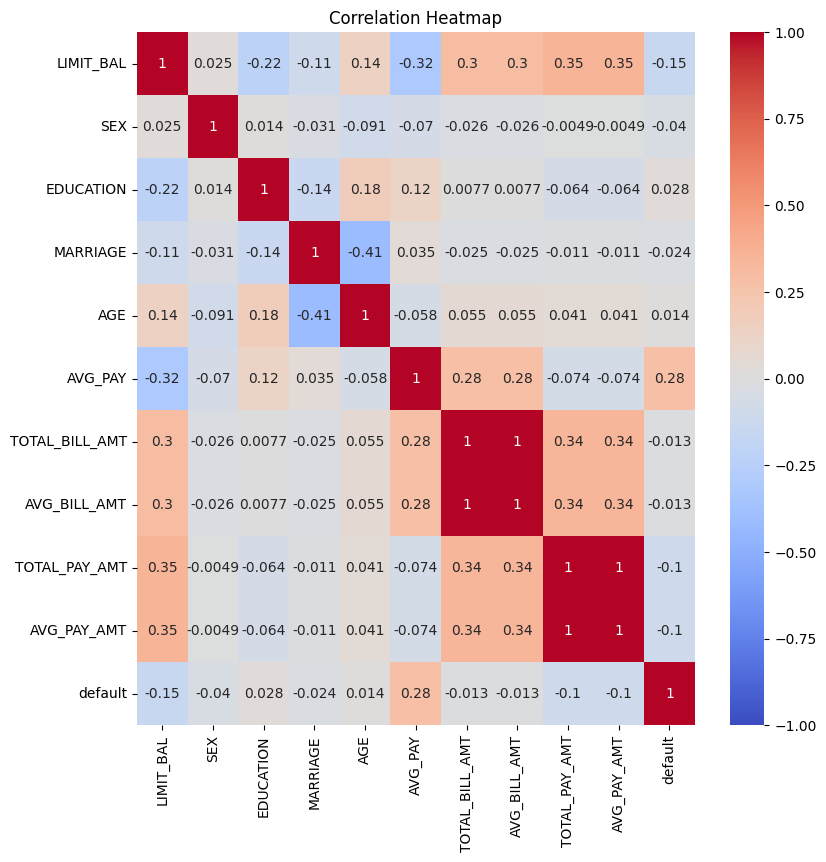

In [348]:
# Correlation heatmap
plt.figure(figsize=(9,9))
plt.title("Correlation Heatmap")
sns.heatmap(credit_data.corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=True)

([<matplotlib.patches.Wedge at 0x78f73a467050>,
 [Text(-0.8449152390547129, 0.704356613380692, 'Class 0'),
  Text(0.844915272028025, -0.7043565738273541, 'Class 1')],
 [Text(-0.460862857666207, 0.38419451638946833, '78%'),
  Text(0.4608628756516499, -0.38419449481492035, '22%')])

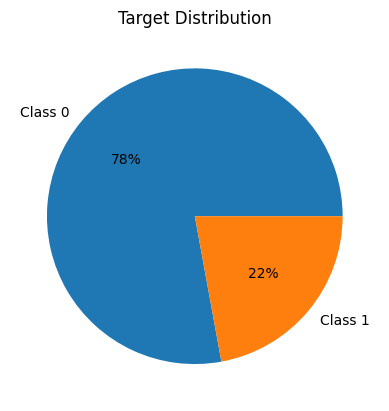

In [349]:
# Pie chart of response variable 'default'
unique, counts = np.unique(credit_data['default'], return_counts=True)
plt.title('Target Distribution')
plt.pie(counts, labels=['Class 0', 'Class 1'], autopct='%.0f%%')

Here, we observe class imbalance in our response variable, this is an issue that may effect predictive performance and must be handled properly.

# 2. Preparing the Data

In [350]:
# Installing Dependencies
import torch
from torch import nn

In [351]:
# Setting device agnostic code
if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"

print(f"Current device : {device}")

Current device : cpu


In [352]:
# Splitting data into target/features
X = credit_data.drop(columns='default', inplace=False).astype(int)
y = credit_data['default'].astype(int)

print(f"Number of features: {len(X.columns)}\nTarget name: '{y.name}'")

Number of features: 10
Target name: 'default'


In [353]:
# Turning data into tensors and setting to current device
X = torch.tensor(X.values).to(device)
y = torch.tensor(y.values).to(device)

print(f"X type: {type(X)}, y type: {type(y)}\
      \nX device: {X.device}, y device: {y.device}")

X type: <class 'torch.Tensor'>, y type: <class 'torch.Tensor'>      
X device: cpu, y device: cpu


In [354]:
# Changing data types to float
X = X.to(torch.float)
y = y.to(torch.float)

print(f"X data type: {X.dtype}\ny data type: {y.dtype}")

X data type: torch.float32
y data type: torch.float32


In [355]:
from sklearn.model_selection import train_test_split

# Splitting data into testing/training
seed = 123
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=seed)


print(f"Training Size: {len(X_train)}, Testing Size: {len(X_test)}\
      \nDesired Testing Size: {int(len(X)*0.2)}")

Training Size: 24000, Testing Size: 6000      
Desired Testing Size: 6000


# 3. Building Model

In [356]:
torch.manual_seed(seed)

# Creating model class
class BinaryClassificationModelv1(nn.Module):
  def __init__(self, in_features, out_features, hidden_units):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Linear(in_features, hidden_units),
        nn.Linear(hidden_units, hidden_units),
        nn.ReLU(),
        nn.Linear(hidden_units, out_features),
    )

  def forward(self, x):
    return self.layer_stack(x)

In [357]:
torch.manual_seed(seed)

# Creating an instance of the model
CreditModelv1 = BinaryClassificationModelv1(in_features=X.shape[1],
                                        out_features=1,
                                        hidden_units=16).to(device)

CreditModelv1

BinaryClassificationModelv1(
  (layer_stack): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): Linear(in_features=16, out_features=16, bias=True)
    (2): ReLU()
    (3): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [358]:
# Create loss/optimizer functions
learn_rate = 0.01
loss_fn = nn.BCEWithLogitsLoss(pos_weight=torch.tensor(2))
optimizer = torch.optim.Adam(params=CreditModelv1.parameters(),
                            lr=learn_rate, weight_decay=0.00001)

In [359]:
# Create accuracy function
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = correct/len(y_pred) * 100
  return acc

# 4. Training/Testing Loop

In [360]:
torch.manual_seed(seed)

epochs = 150

epoch_count = []
train_loss_count = []
test_loss_count = []

for epoch in range(epochs):
  # TRAINING !!!
  CreditModelv1.train()
  epoch_count.append(epoch)

  # 1. Forward step
  y_logits = CreditModelv1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss/accuracy
  loss = loss_fn(y_logits, y_train)
  train_loss_count.append(loss.item())
  acc = accuracy_fn(y_train, y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backwards
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # TESTING !!!
  CreditModelv1.eval()
  with torch.inference_mode():

    # 1. Forward pass
    test_logits = CreditModelv1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss
    test_loss = loss_fn(test_logits, y_test)
    test_loss_count.append(test_loss.item())
    test_acc = accuracy_fn(y_test, test_pred)

  # Printing results of every 10 epochs
  if epoch % 10 == 0:
    print(f"Epoch: {epoch}, Loss: {loss:.4f}, Accuracy: {acc:.2f}%, "
            f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0, Loss: 0.9004, Accuracy: 22.23%, Test Loss: 0.8741, Test Accuracy: 24.98%
Epoch: 10, Loss: 0.7788, Accuracy: 78.47%, Test Loss: 0.7676, Test Accuracy: 79.12%
Epoch: 20, Loss: 0.7475, Accuracy: 80.28%, Test Loss: 0.7385, Test Accuracy: 80.02%
Epoch: 30, Loss: 0.7331, Accuracy: 80.32%, Test Loss: 0.7251, Test Accuracy: 79.85%
Epoch: 40, Loss: 0.7264, Accuracy: 80.52%, Test Loss: 0.7221, Test Accuracy: 80.13%
Epoch: 50, Loss: 0.7232, Accuracy: 80.55%, Test Loss: 0.7190, Test Accuracy: 80.10%
Epoch: 60, Loss: 0.7211, Accuracy: 80.59%, Test Loss: 0.7178, Test Accuracy: 80.10%
Epoch: 70, Loss: 0.7190, Accuracy: 80.58%, Test Loss: 0.7172, Test Accuracy: 80.05%
Epoch: 80, Loss: 0.7163, Accuracy: 80.58%, Test Loss: 0.7150, Test Accuracy: 80.08%
Epoch: 90, Loss: 0.7128, Accuracy: 80.58%, Test Loss: 0.7134, Test Accuracy: 80.10%
Epoch: 100, Loss: 0.7100, Accuracy: 80.57%, Test Loss: 0.7131, Test Accuracy: 80.10%
Epoch: 110, Loss: 0.7087, Accuracy: 80.58%, Test Loss: 0.7128, Test Accuracy

# 5. Evaluating the Model

In [361]:
# Count distribution of predictions vs actual
class_zero_preds = 0
class_one_preds = 0
class_zero_actual = 0
class_one_actual = 0

for i in range(len(test_pred)):
  if test_pred[i] == 0:
    class_zero_preds += 1
  elif test_pred[i] == 1:
    class_one_preds += 1

  if y_test[i] == 0:
    class_zero_actual += 1
  elif y_test[i] == 1:
    class_one_actual += 1

# Printing results
print(f'Predictions:\nClass zero: {class_zero_preds}\nClass one: {class_one_preds}\n---\
\nActual:\nClass zero: {class_zero_actual}\nClass one: {class_one_actual}\n---\
\nPrediction Accuracy: {test_acc:.2f}%')

Predictions:
Class zero: 5248
Class one: 752
---
Actual:
Class zero: 4696
Class one: 1304
---
Prediction Accuracy: 79.80%


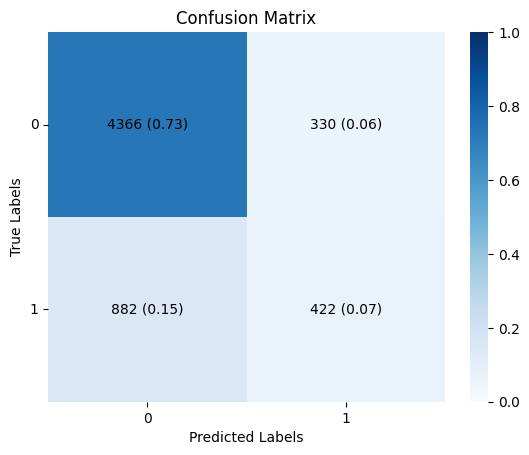

In [362]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

def show_confusion_matrix(y_true, preds):
  '''
  Plots confusion matrix
  '''

  # Take confusion matrices with both values and percentages
  cm_values = confusion_matrix(y_true.cpu().numpy(), preds.cpu().numpy())
  cm_probs = confusion_matrix(y_true.cpu().numpy(), preds.cpu().numpy(),
                              normalize='all')

  # Convert into DataFrames
  df_values = pd.DataFrame(cm_values, index=[0,1], columns=[0,1])
  df_probs = pd.DataFrame(cm_probs, index=[0,1], columns=[0,1])

  # Combine into one DataFrame
  df_cm = pd.DataFrame({
      0: [f'{df_values.iloc[0,0]} ({df_probs.iloc[0,0]:.2f})',
          f'{df_values.iloc[1,0]} ({df_probs.iloc[1,0]:.2f})'],

      1: [f'{df_values.iloc[0,1]} ({df_probs.iloc[0,1]:.2f})',
          f'{df_values.iloc[1,1]} ({df_probs.iloc[1,1]:.2f})']

  })

  # Display confusion matrix using heatmap of percentages
  ax = sns.heatmap(df_probs, annot=False, cmap='Blues', vmin=0.0, vmax=1.0)

  # Format text
  for i in range(df_probs.shape[0]):
      for j in range(df_probs.shape[1]):
          ax.text(j + 0.5, i + 0.5, df_cm.iloc[i, j],
                  ha='center', va='center', color='black', fontsize=10)


  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.yticks(rotation=0)
  plt.title('Confusion Matrix')

# Displaying confusion matrix
show_confusion_matrix(y_test, test_pred)

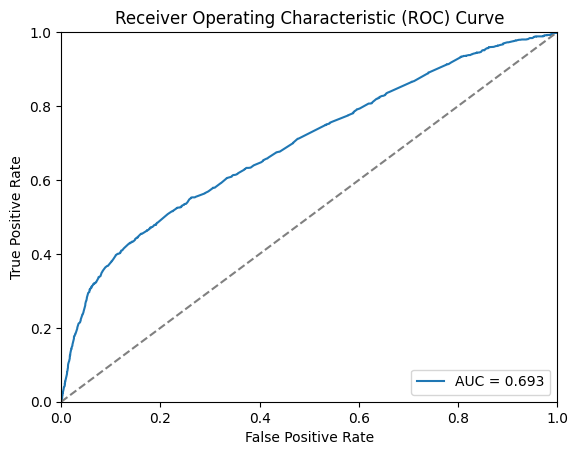

In [363]:
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(y_true, preds):
    """
    Plots the ROC Curve and calculates ROC AUC score
    """

    # Calculate ROC AUC score
    auc = roc_auc_score(y_true.cpu().numpy(), preds.cpu().numpy())

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_true.cpu(), preds.cpu())
    plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')

# Plotting ROC Curve
plot_roc_curve(y_test, test_logits)

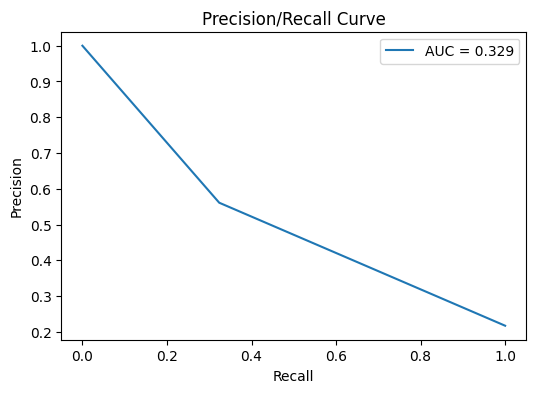

In [364]:
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_precision_recall(y_true, preds):
  '''
  Plots Precision/Recall Curve and calculates AUC score
  '''

  # Calculate precision and recall
  precision, recall, thresholds = precision_recall_curve(y_true.cpu().numpy(),
                                                         torch.sigmoid(preds).cpu().numpy())

  # Calculate AUC score
  auc = average_precision_score(y_true.cpu().numpy(), torch.sigmoid(preds).cpu().numpy())

  # Plot Precision-Recall Curve
  plt.figure(figsize=(6, 4))
  plt.plot(recall, precision, label=f'AUC = {auc:.3f}')
  plt.title('Precision/Recall Curve')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.legend(loc='upper right')
  plt.show()

# Plotting Precision/Recall Curve
plot_precision_recall(y_test, test_pred)

This model has great accuracy but does not tell us much about the data since it is biased towards the majority class. We can handle this using SMOTE.

# 6. Resampling Data

In [365]:
# Resampling data using SMOTE
from imblearn.over_sampling import SMOTE

X = credit_data.drop(columns='default', axis=1)
y = credit_data['default']

smote = SMOTE(random_state=seed)
X_new, y_new = smote.fit_resample(X, y.astype(int))

In [366]:
# Turning data into tensors and setting to current device
X_new = torch.tensor(X_new.values).to(device)
y_new = torch.tensor(y_new.values).to(device)

print(f"New X type: {type(X_new)}, New y type: {type(y_new)}\
      \nNew X device: {X_new.device}, New y device: {y_new.device}")

New X type: <class 'torch.Tensor'>, New y type: <class 'torch.Tensor'>      
New X device: cpu, New y device: cpu


In [367]:
# Changing data types to float
X_new = X_new.to(torch.float)
y_new = y_new.to(torch.float)

print(f"New X data type: {X_new.dtype}\nNew y data type: {y_new.dtype}")

New X data type: torch.float32
New y data type: torch.float32


In [368]:
# Splitting data into testing/training
seed = 123
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new,
                                                    test_size=0.2,
                                                    random_state=seed)


print(f"Training Size: {len(X_train_new)}, Testing Size: {len(X_test_new)}\
      \nDesired Testing Size: {int(len(X_new)*0.2)}")

Training Size: 37382, Testing Size: 9346      
Desired Testing Size: 9345


# 7. Rebuilding Model

In [369]:
torch.manual_seed(seed)

# Creating model class
class BinaryClassificationModelv2(nn.Module):
  def __init__(self, in_features, out_features, hidden_units):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Linear(in_features, hidden_units),
        nn.Linear(hidden_units, hidden_units),
        nn.ReLU(),
        nn.Linear(hidden_units, hidden_units),
        nn.ReLU(),
        nn.Linear(hidden_units, hidden_units),
        nn.ReLU(),
        nn.Linear(hidden_units, out_features),
    )

  def forward(self, x):
    return self.layer_stack(x)

In [370]:
torch.manual_seed(seed)

# Creating an instance of the model
CreditModelv2 = BinaryClassificationModelv2(in_features=X_new.shape[1],
                                        out_features=1,
                                        hidden_units=128).to(device)

CreditModelv2

BinaryClassificationModelv2(
  (layer_stack): Sequential(
    (0): Linear(in_features=10, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): ReLU()
    (5): Linear(in_features=128, out_features=128, bias=True)
    (6): ReLU()
    (7): Linear(in_features=128, out_features=1, bias=True)
  )
)

In [371]:
# Create loss/optimizer functions
learn_rate = 0.01
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=CreditModelv2.parameters(),
                            lr=learn_rate, weight_decay=0.0000001)

# 8. Training/Testing Loop

In [372]:
torch.manual_seed(seed)

epochs = 570

for epoch in range(epochs+1):
  # TRAINING
  CreditModelv2.train()
  epoch_count.append(epoch)

  # 1. Forward step
  y_logits = CreditModelv2(X_train_new).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train_new)
  acc = accuracy_fn(y_train_new, y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backwards
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # TESTING
  CreditModelv2.eval()
  with torch.inference_mode():

    # 1. Forward pass
    test_logits = CreditModelv2(X_test_new).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss
    test_loss = loss_fn(test_logits, y_test_new)
    test_acc = accuracy_fn(y_test_new, test_pred)

  # Printing results of every 10 epochs
  if epoch % 10 == 0:
    print(f"Epoch: {epoch}, Loss: {loss:.4f}, Accuracy: {acc:.2f}%, "
            f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0, Loss: 0.6928, Accuracy: 51.17%, Test Loss: 0.6531, Test Accuracy: 63.33%
Epoch: 10, Loss: 0.6029, Accuracy: 67.07%, Test Loss: 0.5980, Test Accuracy: 67.95%
Epoch: 20, Loss: 0.5790, Accuracy: 69.60%, Test Loss: 0.5759, Test Accuracy: 69.52%
Epoch: 30, Loss: 0.5731, Accuracy: 70.06%, Test Loss: 0.5768, Test Accuracy: 70.06%
Epoch: 40, Loss: 0.5673, Accuracy: 71.00%, Test Loss: 0.5696, Test Accuracy: 70.17%
Epoch: 50, Loss: 0.5604, Accuracy: 71.49%, Test Loss: 0.5664, Test Accuracy: 70.85%
Epoch: 60, Loss: 0.5610, Accuracy: 71.81%, Test Loss: 0.5659, Test Accuracy: 71.13%
Epoch: 70, Loss: 0.5526, Accuracy: 72.16%, Test Loss: 0.5628, Test Accuracy: 71.59%
Epoch: 80, Loss: 0.5494, Accuracy: 72.18%, Test Loss: 0.5612, Test Accuracy: 71.51%
Epoch: 90, Loss: 0.5395, Accuracy: 72.97%, Test Loss: 0.5524, Test Accuracy: 71.92%
Epoch: 100, Loss: 0.5683, Accuracy: 69.32%, Test Loss: 0.5762, Test Accuracy: 69.17%
Epoch: 110, Loss: 0.5587, Accuracy: 70.85%, Test Loss: 0.5647, Test Accuracy

# 9. Re-evaluating the Model

In [373]:
# Count distribution of predictions vs actual
class_zero_preds = 0
class_one_preds = 0
class_zero_actual = 0
class_one_actual = 0

for i in range(len(test_pred)):
  if test_pred[i] == 0:
    class_zero_preds += 1
  elif test_pred[i] == 1:
    class_one_preds += 1

  if y_test_new[i] == 0:
    class_zero_actual += 1
  elif y_test_new[i] == 1:
    class_one_actual += 1

# Printing results
print(f'Predictions:\nClass zero: {class_zero_preds}\nClass one: {class_one_preds}\n---\
\nActual:\nClass zero: {class_zero_actual}\nClass one: {class_one_actual}\n---\
\nPrediction Accuracy: {test_acc:.2f}%')

Predictions:
Class zero: 4029
Class one: 5317
---
Actual:
Class zero: 4620
Class one: 4726
---
Prediction Accuracy: 78.23%


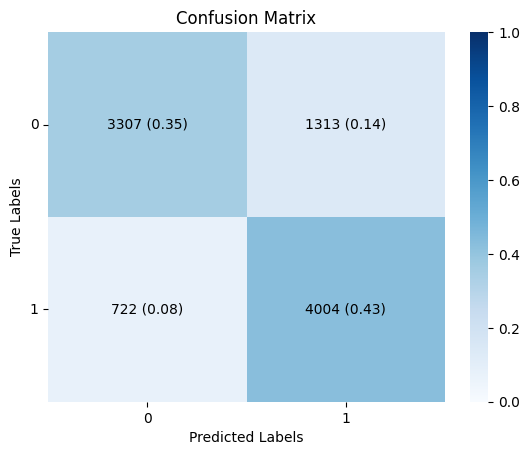

In [374]:
# Showing confusion matrix
show_confusion_matrix(y_test_new, test_pred)

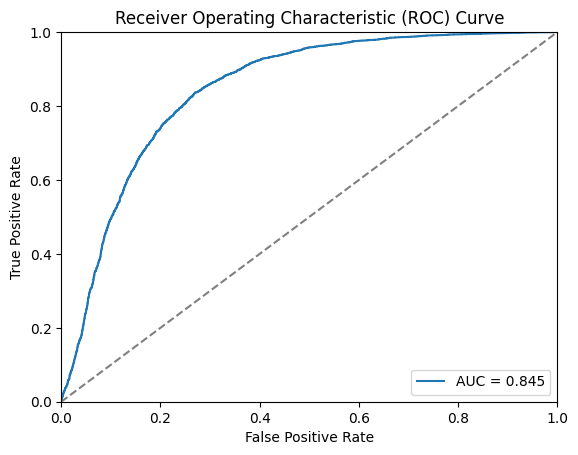

In [375]:
# Plotting ROC Curve and its AUC score
plot_roc_curve(y_test_new, test_logits)

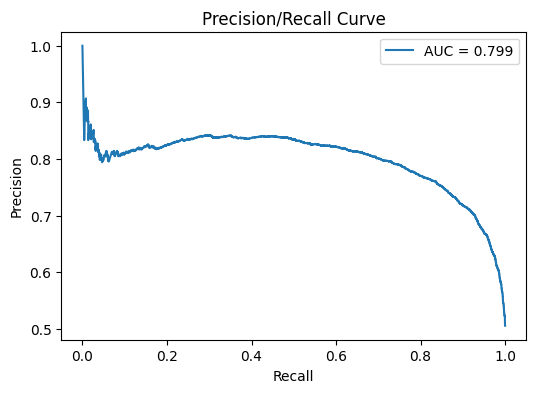

In [376]:
# Plotting Precision/Recall Curve and its AUC score
plot_precision_recall(y_test_new, test_logits)